In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score, precision_score , recall_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
import sys
import statistics 
from statistics import mode


In [11]:

def FindDistance(test_row, train_row):
    dis = np.sqrt(np.sum([(x - y)**2 for x, y in zip(test_row, train_row)]))
    return dis


In [ ]:
def Read_data():
    TrainSet   = pd.read_csv('train.csv',header = None)
    TrainSet   = TrainSet.head(100)
    TrainLabel = TrainSet[0]
    del TrainSet[0]
    TestSet    = pd.read_csv('test.csv',header = None)
    TestLabel  = pd.read_csv('test_labels.csv',header = None)
    #print(TestSet[10])
    #print(TrainSet[11])
    ColumnsNamesArr = TrainSet.columns.values
    #print(ColumnsNamesArr)
    ColumnsNames = TestSet.columns.values
    #print(ColumnsNames)
    return TrainSet, TestSet, TrainLabel, TestLabel
#TrainSet, TestSet, TestLabel,TrainLabel = Read_data()


In [20]:
def SplitData( trainData,  percent ):
    trainData = trainData.head(1000)
    mask = np.random.rand(len(trainData)) < percent
    TrainSet   = trainData[mask]
    TestSet    = trainData[~mask]
    #print(TrainSet)
    #print(TestSet)
    TrainLabel = TrainSet[0]
    del TrainSet[0]
    TestLabel  = TestSet[0]
    del TestSet[0]
    return TrainSet, TestSet, TrainLabel, TestLabel

TrainSet, TestSet, TrainLabel, TestLabel = SplitData(pd.read_csv('train.csv',header = None) , 0.7)    
TrainSet,TestSet = ModifyData(TrainSet, TestSet)
Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,1)
num = []
ks = [1,2,3,4,5]
num.append(evaluate_result( TestLabel, Solution))

    
    

('accuracy_score\t : ', 1.0)


('accuracy_score\t : ', 1.0)
('accuracy_score\t : ', 1.0)
('accuracy_score\t : ', 1.0)
('accuracy_score\t : ', 1.0)


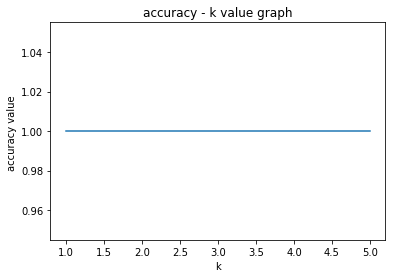

In [21]:
Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,2)
num.append(evaluate_result( TestLabel, Solution))
Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,3)
num.append(evaluate_result( TestLabel, Solution))
Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,4)
num.append(evaluate_result( TestLabel, Solution))
Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,5)
num.append(evaluate_result( TestLabel, Solution))
plt.plot(ks,num)
plt.xlabel('k') 
plt.ylabel('accuracy value ') 
plt.title('accuracy - k value graph') 
plt.show() 

In [22]:
print(num)

[1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
class KNNClassifier:
    TrainData = pd.DataFrame()
    TrainLabel=pd.DataFrame()
    
    def evaluate_result( self,y_test, y_pred):
        #matrix = confusion_matrix(y_test, y_pred)
        #print(y_test)
        #print(y_pred)
        #df = pd.DataFrame(matrix)
        #df = df.transpose()
        #print(df.head())
        #f1 = f1_score(y_test, y_pred, average="macro")
        #ps = precision_score(y_test, y_pred, average="macro")
        #rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        print("accuracy_score : ", acs)
    #return np.array([acs, ps, rs, f1])
    
    
    
    def Encoding(self , Set ):
        df=Set
        lis = [['b','c','x','f','k','s'],
               ['f', 'g' , 'y', 's'],
               ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y']
                ,['t', 'f'], 
               ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                 ['a', 'f', 'd', 'n'],
               ['c', 'w' , 'd'],
                 ['b', 'n'],
               ['k', 'n' , 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y']  
                  , ['e', 't'] ,
               ['b','c','u','e','z','r'],
                  ['f', 'y' , 'k', 's'],
                  ['f', 'y' , 'k', 's'],
                  ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                  ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                  ['p', 'u'],
                   ['n', 'o', 'w', 'y'],
                  ['n', 'o', 't'],
                  ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                  ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                   ['a', 'c', 'n', 's', 'v', 'y'],
                  ['g', 'l', 'm', 'p', 'u', 'w', 'd']
              ]
        #print(df.shape)
        #print(Set.columns)
        col = Set.columns.values 
        i=0
        NewDf=pd.DataFrame()
        for column in col:
            dummies = pd.get_dummies(data=df[column],columns=lis[i])
            dummies=dummies.T.reindex(lis[i]).T.fillna(0)
            #print(dummies)
            NewDf=pd.concat([NewDf,dummies],axis=1,sort=False)
            i=i+1
        #print(NewDf)

        return NewDf

    
    
    def train(self,filename):
        TrainSet   = pd.read_csv(filename ,header = None)
        #TrainSet   = TrainSet.head(100)
        self.TrainData  = TrainSet
        self.TrainLabel = TrainSet[0]
        del self.TrainData[0]
        
        #TrainSet, TestSet, self.TrainLabel, TestLabel = SplitData( TrainSet , 0.7)
        #TrainSet,TestSet = ModifyData(TrainSet, TestSet)
        #Solution = KnnForAll(TrainSet, TestSet, self.TrainLabel,TestLabel,3)
        #evaluate_result( TestLabel, Solution)
    
    
    def FindDistance(test_row, train_row):
        dis = np.sqrt(np.sum([(x - y)**2 for x, y in zip(test_row, train_row)]))
        return dis

    
    def predict(self,filename):
        TestSet = pd.read_csv(filename ,header = None)
        #TestSet = TestSet.head(10)
        self.TrainData,TestSet = self.ModifyData(self.TrainData, TestSet)
        Solution = self.KnnForAll(self.TrainData, TestSet, self.TrainLabel,3)
        return Solution
    
        
    def KnnForAll(self,TrainSet,TestSet,TrainLabel,k):
        solution=pd.DataFrame()
        solution['predicted'] = [
            self.KNNForOne(TrainSet, row, TrainLabel,k) for i , row in TestSet.iterrows()
        ]
        return solution.values
    
    
    
    
    def KNNForOne(self,TrainSet, TestPoint,TrainLabel,k):
        distance=[]

        for (index , TrainPoint) in TrainSet.iterrows():
            dist=self.FindDistance(TrainPoint , TestPoint)
            distance.append(dist)
            #print(" distance : ")    
            #print(len(distance))    
            #print(TrainLabel)    
            #print("label : ")
        #print(len(TrainLabel))
        distanceLabelPair = [list(x) for x in zip(distance, TrainLabel)]
            #print(" pair ")
        #print(len(distanceLabelPair))
        distanceLabelPair.sort()
        labelList = zip(*distanceLabelPair)[1]
        labelList = labelList[:k]
        most_frequent = max(set(labelList), key=labelList.count)
        return most_frequent

    def ModifyData(self,TrainSet, TestSet ):
        #print(TrainSet['?'])
        #print(" In modifyData ")
        #print(TrainSet)
        #mTrain   = TrainSet.mode()[11][0]
        #mTest    = TestSet.mode()[10][0]
        ColumnsNamesArr = TrainSet.columns.values
        for col in ColumnsNamesArr:
            mTrain = TrainSet[col].mode()[0]
            TrainSet.replace(to_replace='?', value = mTrain , inplace = True)
        #TestSet.replace(to_replace = '?',value = mTest , inplace  = True)
        #print(TrainSet['?'])
        #print(TestSet['b.1'])
        return self.Encoding(TrainSet), self.Encoding(TestSet)



        

        
    

In [ ]:
knn_classifier = KNNClassifier()
k=3
knn_classifier.train('train.csv')
predictions = knn_classifier.predict('test.csv')
#print(predictions)
test_labels=[]

with open("test_labels.csv") as f:
    for line in f:
        test_labels.append(line.strip())
knn_classifier.evaluate_result(test_labels, predictions)



    

In [6]:
def Encoding(Set ):
    df=Set
    lis = [['b','c','x','f','k','s'],
           ['f', 'g' , 'y', 's'],
           ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y']
            ,['t', 'f'], 
           ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
             ['a', 'f', 'd', 'n'],
           ['c', 'w' , 'd'],
             ['b', 'n'],
           ['k', 'n' , 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y']  
              , ['e', 't'] ,
           ['b','c','u','e','z','r'],
              ['f', 'y' , 'k', 's'],
              ['f', 'y' , 'k', 's'],
              ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
              ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
              ['p', 'u'],
               ['n', 'o', 'w', 'y'],
              ['n', 'o', 't'],
              ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
              ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
               ['a', 'c', 'n', 's', 'v', 'y'],
              ['g', 'l', 'm', 'p', 'u', 'w', 'd']
          ]
    #print(df.shape)
    col = Set.columns.values                                 
    i=0
    NewDf=pd.DataFrame()
    for column in col:
        dummies = pd.get_dummies(data=df[column],columns=lis[i])
        dummies=dummies.T.reindex(lis[i]).T.fillna(0)
        #print(dummies)
        NewDf=pd.concat([NewDf,dummies],axis=1,sort=False)
        i=i+1
    #print(NewDf)

    return NewDf
    #print(Encoded)
#Set = pd.read_csv('train.csv')
#TrainSet, TestSet, TestLabel,TrainLabel = Read_data()
#Encoding(TrainSet)

In [34]:
def evaluate_result( y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    #print(y_test)
    #print(y_pred)
    df = pd.DataFrame(matrix)
    df = df.transpose()
    print(df.head())
    f1 = f1_score(y_test, y_pred, average="macro")
    ps = precision_score(y_test, y_pred, average="macro")
    rs = recall_score(y_test, y_pred, average="macro")
    acs = accuracy_score(y_test, y_pred)
    print("accuracy_score  : ", acs)
    print("f1_score  : ", acs)
    print("recall_score  : ", acs)
    return acs
    #return np.array([acs, ps, rs, f1])

In [3]:
def KNNForOne(TrainSet, TestPoint,TrainLabel,k):
    distance=[]
    
    for (index , TrainPoint) in TrainSet.iterrows():
        dist=FindDistance(TrainPoint , TestPoint)
        distance.append(dist)
    #print(" distance : ")    
    #print(len(distance))    
    #print(TrainLabel)    
    #print("label : ")
    #print(len(TrainLabel))
    distanceLabelPair = [list(x) for x in zip(distance, TrainLabel)]
    #print(" pair ")
    #print(len(distanceLabelPair))
    distanceLabelPair.sort()
    labelList = zip(*distanceLabelPair)[1]
    labelList = labelList[:k]
    most_frequent = max(set(labelList), key=labelList.count)
    return most_frequent
        

In [2]:
def KnnForAll(TrainSet,TestSet,TrainLabel,TestLabel,k):
    solution=pd.DataFrame()
    solution['predicted'] = [
        KNNForOne(TrainSet, row, TrainLabel,k) for i , row in TestSet.iterrows()
    ]
    return solution.values

Replace The missing value '?' with Mode of that column


In [ ]:
def ModifyData(TrainSet, TestSet ):
    #print(TrainSet['?'])
    mTrain   = TrainSet.mode()[11][0]
    mTest    = TestSet.mode()[10][0]
    #print(mTrain)
    #print(mTest)
    #ColumnsNamesArr = TrainSet.columns.values
    #print(ColumnsNamesArr)
    ColumnsNamesArr = TrainSet.columns.values
    for col in ColumnsNamesArr:
        mTrain = TrainSet[col].mode()[0]
        TrainSet.replace(to_replace='?', value = mTrain , inplace = True)
    #TrainSet.replace(to_replace='?', value = mTrain , inplace = True)
    #TestSet.replace(to_replace = '?',value = mTest , inplace  = True)
    #print(TrainSet['?'])
    #print(TestSet['b.1'])
    return Encoding(TrainSet), Encoding(TestSet)

#ModifyData(TrainSet, TestSet)




In [ ]:
def solve():
    TrainSet, TestSet, TrainLabel,TestLabel = Read_data()
    TrainSet,TestSet = ModifyData(TrainSet, TestSet)
    Solution = KnnForAll(TrainSet, TestSet, TrainLabel,TestLabel,3)
    evaluate_result( TestLabel, Solution)
solve()    
    

### Accuracy Using Sklearn Knn classifier

('Accuracy Score for :  k = ', 1, 1.0)
('Accuracy Score for :  k = ', 2, 1.0)
('Accuracy Score for :  k = ', 3, 1.0)
('Accuracy Score for :  k = ', 4, 1.0)
('Accuracy Score for :  k = ', 5, 1.0)
 Graph : 


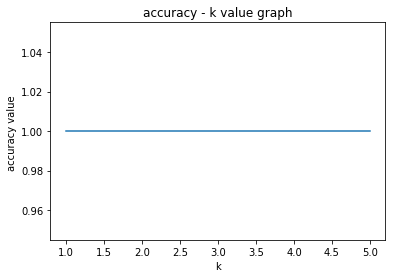

In [38]:
TrainSet, TestSet, TrainLabel,TestLabel = Read_data()
TrainSet,TestSet = ModifyData(TrainSet, TestSet)
s=[]
for i in range (1,6):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(TrainSet, TrainLabel)
    s.append(knn.score(TestSet,TestLabel))
    print("Accuracy Score for :  k = ", i , knn.score(TestSet , TestLabel))
print(" Graph : ")
ks1 = [1,2,3,4,5]
plt.plot(ks,num)
plt.xlabel('k') 
plt.ylabel('accuracy value ') 
plt.title('accuracy - k value graph') 
plt.show() 